<a href="https://colab.research.google.com/github/Tatianakami/spotify-recommendation-pyspark/blob/main/recomendador_musical_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
!pip install pyspark

In [115]:
# 1. Instalação
!pip install pyspark -q

# 2. Montagem do Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# 3. Importação e Sessão
from pyspark.sql import SparkSession
sessao_spark = SparkSession.builder \
    .appName("Recomendador_Spotify") \
    .getOrCreate()

# 4. Caminho e Leitura
file_path = '/content/drive/MyDrive/sistema_recomendacao_spark/base_dados/dados_musicas.csv'

try:
    df_spark = sessao_spark.read.csv(file_path, header=True, inferSchema=True)
    print("✅ Sucesso! O Spark está ativo e os dados foram lidos.")
    df_spark.show(5)
except Exception as e:
    print(f"❌ Erro ao ler o arquivo: \n{e}")

Mounted at /content/drive
✅ Sucesso! O Spark está ativo e os dados foram lidos.
+------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|valence;year;acousticness;artists;danceability;duration_ms;energy;explicit;id;instrumentalness;key;liveness;loudness;mode;name;popularity;speechiness;tempo;artists_song|
+------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|                                                                                                                                                    0.285;2000;0.0023...|
|                                                                                                                                                    0.613;2000;0.143;...|
|                                                                

In [116]:
from pyspark.sql import SparkSession

# Criando ou recuperando a sessão
spark = SparkSession.builder \
    .appName("Sistema_Recomendacao") \
    .getOrCreate()

# Teste se funcionou
print("Spark Session criada com sucesso!")
spark

Spark Session criada com sucesso!


**Leitura dos dados**

In [117]:
from pyspark import SparkFiles

In [118]:
from os import path
url_dados = 'https://github.com/IgorNascAlves/dados/blob/main/dados_musicas.csv?raw=true'
sessao_spark.sparkContext.addFile(url_dados)
path_dados_file = 'file://' + SparkFiles.get('dados_musicas.csv')

In [119]:
dados = sessao_spark.read.csv(path_dados_file, header=True, sep=';', inferSchema=True)

In [120]:
dados.printSchema()

root
 |-- valence: double (nullable = true)
 |-- year: integer (nullable = true)
 |-- acousticness: double (nullable = true)
 |-- artists: string (nullable = true)
 |-- danceability: double (nullable = true)
 |-- duration_ms: integer (nullable = true)
 |-- energy: double (nullable = true)
 |-- explicit: integer (nullable = true)
 |-- id: string (nullable = true)
 |-- instrumentalness: double (nullable = true)
 |-- key: integer (nullable = true)
 |-- liveness: double (nullable = true)
 |-- loudness: double (nullable = true)
 |-- mode: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- popularity: integer (nullable = true)
 |-- speechiness: double (nullable = true)
 |-- tempo: double (nullable = true)
 |-- artists_song: string (nullable = true)



In [121]:
dados.show()

+------------------+----+------------+--------------+------------------+-----------+------------------+--------+--------------------+--------------------+---+--------+-------------------+----+--------------------+----------+-----------+------------------+--------------------+
|           valence|year|acousticness|       artists|      danceability|duration_ms|            energy|explicit|                  id|    instrumentalness|key|liveness|           loudness|mode|                name|popularity|speechiness|             tempo|        artists_song|
+------------------+----+------------+--------------+------------------+-----------+------------------+--------+--------------------+--------------------+---+--------+-------------------+----+--------------------+----------+-----------+------------------+--------------------+
|             0.285|2000|     0.00239|      Coldplay|             0.429|     266773|0.6609999999999999|       0|3AJwUDP919kvQ9Qco...|             1.21E-4| 11|   0.234|  

In [122]:
dados.count()

20311

In [123]:
len(dados.columns)

19

In [124]:
import pyspark.sql.functions as f

In [125]:
dados.select([f.count(f.when(f.isnull(c), 1)).alias(c) for c in dados.columns]).show()

+-------+----+------------+-------+------------+-----------+------+--------+---+----------------+---+--------+--------+----+----+----------+-----------+-----+------------+
|valence|year|acousticness|artists|danceability|duration_ms|energy|explicit| id|instrumentalness|key|liveness|loudness|mode|name|popularity|speechiness|tempo|artists_song|
+-------+----+------------+-------+------------+-----------+------+--------+---+----------------+---+--------+--------+----+----+----------+-----------+-----+------------+
|      0|   0|           0|      0|           0|          0|     0|       0|  0|               0|  0|       0|       0|   0|   0|         0|          0|    0|           0|
+-------+----+------------+-------+------------+-----------+------+--------+---+----------------+---+--------+--------+----+----+----------+-----------+-----+------------+



**Anos**

In [126]:
dados.select('year').distinct().collect()

[Row(year=2003),
 Row(year=2007),
 Row(year=2018),
 Row(year=2015),
 Row(year=2006),
 Row(year=2013),
 Row(year=2014),
 Row(year=2019),
 Row(year=2004),
 Row(year=2020),
 Row(year=2012),
 Row(year=2009),
 Row(year=2016),
 Row(year=2001),
 Row(year=2005),
 Row(year=2000),
 Row(year=2010),
 Row(year=2011),
 Row(year=2008),
 Row(year=2017),
 Row(year=2002)]

**
Análise dos dados**

In [127]:
url_anos_dados = 'https://github.com/IgorNascAlves/dados/blob/main/dados_musicas_ano.csv?raw=true'

sessao_spark.sparkContext.addFile(url_anos_dados)
path_dados_file = 'file://' + SparkFiles.get('dados_musicas_ano.csv')

dados_anos = sessao_spark.read.csv(path_dados_file, header=True, inferSchema=True)

In [128]:
dados_anos.show()

+----+----+------------------+-------------------+------------------+-------------------+-------------------+-------------------+-------------------+-------------------+------------------+-------------------+-------------------+---+
|mode|year|      acousticness|       danceability|       duration_ms|             energy|   instrumentalness|           liveness|           loudness|        speechiness|             tempo|            valence|         popularity|key|
+----+----+------------------+-------------------+------------------+-------------------+-------------------+-------------------+-------------------+-------------------+------------------+-------------------+-------------------+---+
|   1|1921|0.8868960000000005| 0.4185973333333336|260537.16666666663|0.23181513333333334|0.34487805886666656|            0.20571| -17.04866666666665|           0.073662|101.53149333333329|0.37932666666666665| 0.6533333333333333|  2|
|   1|1922|0.9385915492957748| 0.4820422535211267|165469.74647887325

**filtro**

In [129]:
dados_anos = dados_anos.filter('year >= 2000')
dados_anos.show()

+----+----+-------------------+------------------+------------------+------------------+-------------------+-------------------+-------------------+-------------------+------------------+------------------+------------------+---+
|mode|year|       acousticness|      danceability|       duration_ms|            energy|   instrumentalness|           liveness|           loudness|        speechiness|             tempo|           valence|        popularity|key|
+----+----+-------------------+------------------+------------------+------------------+-------------------+-------------------+-------------------+-------------------+------------------+------------------+------------------+---+
|   1|2000|0.28932270051635994| 0.590918047034764| 242724.6426380368|0.6254128323108387|0.10116776879345596| 0.1976860429447853| -8.247765848670758|0.08920541922290394| 118.9993231083843|0.5594754601226991|  46.6840490797546|  7|
|   1|2001| 0.2868424748428934|0.5833178553615969|240307.79600997505|0.626985522

**Conta a quantidade de valores**

In [130]:
dados_anos.count()

21

In [131]:
len(dados_anos.columns)

14

**Analise**

In [132]:
import plotly.express as px

fig = px.line(dados_anos.toPandas(), x='year', y='loudness', markers=True, title='Variação do loudness conforme os anos')
fig.show()

**pandas**

In [133]:
import plotly.graph_objects as go

fig = go.Figure()

temp = dados_anos.toPandas()

In [134]:
fig.add_trace(go.Scatter(x=temp['year'], y=temp['acousticness'], name='Acousticness'))

fig.show()

In [135]:
import plotly.graph_objects as go

fig = go.Figure()

temp = dados_anos.toPandas()

fig.add_trace(go.Scatter(x=temp['year'], y=temp['acousticness'], name='Acousticness'))
fig.add_trace(go.Scatter(x=temp['year'], y=temp['valence'],
                    name='Valence'))
fig.add_trace(go.Scatter(x=temp['year'], y=temp['danceability'],
                    name='Danceability'))
fig.add_trace(go.Scatter(x=temp['year'], y=temp['energy'],
                    name='Energy'))
fig.add_trace(go.Scatter(x=temp['year'], y=temp['instrumentalness'],
                    name='Instrumentalness'))
fig.add_trace(go.Scatter(x=temp['year'], y=temp['liveness'],
                    name='Liveness'))
fig.add_trace(go.Scatter(x=temp['year'], y=temp['speechiness'],
                    name='Speechiness'))

fig.show()

**Matriz de correlação**

In [136]:
fig = px.imshow(dados_anos.drop('mode').toPandas().corr(), text_auto=True)
fig.show()

**StandardScaler**

In [137]:
url_dados_generos = 'https://github.com/IgorNascAlves/dados/blob/main/dados_musicas_genero.csv?raw=true'

sessao_spark.sparkContext.addFile(url_dados_generos)
path_dados_file = "file://" + SparkFiles.get("dados_musicas_genero.csv")

dados_generos = sessao_spark.read.csv(path_dados_file, header=True, inferSchema= True)

In [138]:
dados_generos.show()

+----+--------------------+-------------------+-------------------+------------------+-------------------+--------------------+-------------------+-------------------+--------------------+------------------+-------------------+------------------+---+
|mode|              genres|       acousticness|       danceability|       duration_ms|             energy|    instrumentalness|           liveness|           loudness|         speechiness|             tempo|            valence|        popularity|key|
+----+--------------------+-------------------+-------------------+------------------+-------------------+--------------------+-------------------+-------------------+--------------------+------------------+-------------------+------------------+---+
|   1|21st century clas...| 0.9793333333333332|0.16288333333333335|160297.66666666663|0.07131666666666665|          0.60683367|             0.3616|-31.514333333333337| 0.04056666666666667|           75.3365|0.10378333333333334| 27.83333333333333| 

In [139]:
dados_generos.count()

2973

In [140]:
dados_generos.select('genres').distinct().count()

2973

In [141]:
len(dados_generos.columns)

14

In [142]:
from pyspark.ml.feature import VectorAssembler

dados_generos.columns

['mode',
 'genres',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'liveness',
 'loudness',
 'speechiness',
 'tempo',
 'valence',
 'popularity',
 'key']

In [143]:
x = dados_generos.columns

In [144]:
X = dados_generos.columns
X.remove('genres')
X

['mode',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'liveness',
 'loudness',
 'speechiness',
 'tempo',
 'valence',
 'popularity',
 'key']

In [145]:
dados_generos_vector = VectorAssembler(inputCols=X, outputCol='features').transform(dados_generos).select(['features', 'genres'])

In [146]:

dados_generos_vector.show(truncate=False, n=5)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------------+
|features                                                                                                                                                                                                                   |genres                |
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------------+
|[1.0,0.9793333333333332,0.16288333333333335,160297.66666666663,0.07131666666666665,0.60683367,0.3616,-31.514333333333337,0.04056666666666667,75.3365,0.10378333333333334,27.83333333333333,6.0]                            |21st century classical|
|[1.0,0.49478,0.2993

In [147]:
from pyspark.ml.feature import StandardScaler
scaler = StandardScaler(inputCol='features', outputCol='scaled_features')

In [148]:
scaler = StandardScaler(inputCol='features', outputCol='scaled_features')
scaler_model = scaler.fit(dados_generos_vector)

In [149]:
dados_generos_scaler = scaler_model.transform(dados_generos_vector)

In [150]:
dados_generos_scaler.show()

+--------------------+--------------------+--------------------+
|            features|              genres|     scaled_features|
+--------------------+--------------------+--------------------+
|[1.0,0.9793333333...|21st century clas...|[2.68174831000279...|
|[1.0,0.49478,0.29...|               432hz|[2.68174831000279...|
|[1.0,0.762,0.7120...|               8-bit|[2.68174831000279...|
|[1.0,0.6514170195...|                  []|[2.68174831000279...|
|[1.0,0.6765573049...|          a cappella|[2.68174831000279...|
|[1.0,0.45921,0.51...|            abstract|[2.68174831000279...|
|[1.0,0.3421466666...|      abstract beats|[2.68174831000279...|
|[1.0,0.2438540633...|    abstract hip hop|[2.68174831000279...|
|[0.0,0.3229999999...|           accordeon|[0.0,1.0101313736...|
|[1.0,0.446125,0.6...|           accordion|[2.68174831000279...|
|[0.0,0.0679505384...|          acid house|[0.0,0.2125045534...|
|[1.0,0.2569145079...|           acid rock|[2.68174831000279...|
|[1.0,0.00683,0.66...|   

In [151]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler, StandardScaler, PCA

# Criando a esteira automática
pca_pipeline = Pipeline(stages=[
    VectorAssembler(inputCols=X, outputCol='features'),
    StandardScaler(inputCol='features', outputCol='scaled_features'),
    PCA(k=2, inputCol='scaled_features', outputCol='pca_features')
])

# Rodando a esteira toda de uma vez
modelo_treinado = pca_pipeline.fit(dados_generos)
dados_generos_pca = modelo_treinado.transform(dados_generos)

In [152]:
from pyspark.ml.clustering import KMeans

In [153]:
SEED = 1224

In [154]:
# 2.  o "organizador" para criar 5 grupos
kmeans = KMeans(featuresCol='pca_features',
                predictionCol='cluster_pca').setK(5).setSeed(SEED)

# 3. Ele aprende com os dados (fit) e depois classifica (transform)
model_kmeans = kmeans.fit(dados_generos_pca)
predictions_kmeans = model_kmeans.transform(dados_generos_pca)

# 4. Visualizando o resultado
predictions_kmeans.select('genres', 'cluster_pca').show(5)

+--------------------+-----------+
|              genres|cluster_pca|
+--------------------+-----------+
|21st century clas...|          2|
|               432hz|          2|
|               8-bit|          4|
|                  []|          0|
|          a cappella|          0|
+--------------------+-----------+
only showing top 5 rows


**Plotando**

In [155]:
from pyspark.ml.functions import vector_to_array

# Criando as colunas separadas para o gráfico
pca_features_xy = predictions_kmeans.withColumn('x', vector_to_array('pca_features')[0])\
                                  .withColumn('y', vector_to_array('pca_features')[1])\
                                  .select(['x', 'y', 'cluster_pca', 'genres'])

In [156]:
pca_features_xy.show()

+-------------------+--------------------+-----------+--------------------+
|                  x|                   y|cluster_pca|              genres|
+-------------------+--------------------+-----------+--------------------+
|-2.5070953668885663|-0.43816913737698293|          2|21st century clas...|
|  0.596967905663348|  -4.981612052751353|          2|               432hz|
|  4.158460276223559|    0.83665250810799|          4|               8-bit|
| 2.3873448785122156|  0.4877989015663361|          0|                  []|
|  2.650121837167907|   0.575681976882043|          0|          a cappella|
| 1.4965091203367622| -1.8644183183717828|          2|            abstract|
| 3.9235207721573224|-0.28518350023528705|          4|      abstract beats|
|  4.611011109831113|  0.6783790472312338|          1|    abstract hip hop|
| 2.8376900630842288|    0.57129937165805|          4|           accordeon|
|  2.706690139892782|  1.2593788079708255|          0|           accordion|
|  4.6983313

In [157]:
fig = px.scatter(pca_features_xy.toPandas(), x='x', y='y', color='cluster_pca', hover_data = ['x','y','genres'])
fig.show()

In [158]:
!pip install -U kaleido

In [159]:
modelo_treinado.stages[2].explainedVariance

DenseVector([0.2975, 0.1212])

In [160]:
dados.show()

+------------------+----+------------+--------------+------------------+-----------+------------------+--------+--------------------+--------------------+---+--------+-------------------+----+--------------------+----------+-----------+------------------+--------------------+
|           valence|year|acousticness|       artists|      danceability|duration_ms|            energy|explicit|                  id|    instrumentalness|key|liveness|           loudness|mode|                name|popularity|speechiness|             tempo|        artists_song|
+------------------+----+------------+--------------+------------------+-----------+------------------+--------+--------------------+--------------------+---+--------+-------------------+----+--------------------+----------+-----------+------------------+--------------------+
|             0.285|2000|     0.00239|      Coldplay|             0.429|     266773|0.6609999999999999|       0|3AJwUDP919kvQ9Qco...|             1.21E-4| 11|   0.234|  

In [161]:
x = list(dados.columns)
x.remove('artists')
x.remove('id')
x.remove('name')
x.remove('artists_song')
x

['valence',
 'year',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'explicit',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'popularity',
 'speechiness',
 'tempo']

In [162]:
dados_encoded_vector = VectorAssembler(inputCols=x, outputCol='features').transform(dados).select(['features', 'artists_song'])

In [163]:
dados.show()

+------------------+----+------------+--------------+------------------+-----------+------------------+--------+--------------------+--------------------+---+--------+-------------------+----+--------------------+----------+-----------+------------------+--------------------+
|           valence|year|acousticness|       artists|      danceability|duration_ms|            energy|explicit|                  id|    instrumentalness|key|liveness|           loudness|mode|                name|popularity|speechiness|             tempo|        artists_song|
+------------------+----+------------+--------------+------------------+-----------+------------------+--------+--------------------+--------------------+---+--------+-------------------+----+--------------------+----------+-----------+------------------+--------------------+
|             0.285|2000|     0.00239|      Coldplay|             0.429|     266773|0.6609999999999999|       0|3AJwUDP919kvQ9Qco...|             1.21E-4| 11|   0.234|  

In [164]:
scaler = StandardScaler(inputCol='features', outputCol='features_scaled')
model_scaler = scaler.fit(dados_encoded_vector)
dados_musicas_scaler = model_scaler.transform(dados_encoded_vector)

In [165]:
dados_musicas_scaler.select('features_scaled').show(truncate=False, n=5)

+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|features_scaled                                                                                                                                                                                                                                                               |
+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|[1.156596679221045,329.8170613984441,0.008403188822334736,2.5040545743834373,3.7858811737298526,2.980511298201045,0.0,6.070790766862789E-4,3.0696424994844875,1.4832857988766257,-1.

In [166]:
k = len(X)
k

13

In [167]:
pca = PCA(k=k, inputCol='features_scaled', outputCol='pca_features')
model_pca = pca.fit(dados_musicas_scaler)
dados_musicas_pca = model_pca.transform(dados_musicas_scaler)

In [168]:
sum(model_pca.explainedVariance) * 100

np.float64(96.99018569070161)

In [169]:
lista_valores = [sum(model_pca.explainedVariance[0:i+1]) for i in range(k)]
lista_valores

[np.float64(0.21297354127107349),
 np.float64(0.3459774162295507),
 np.float64(0.43989805678254446),
 np.float64(0.5267820578269103),
 np.float64(0.6001038103117929),
 np.float64(0.666571951365239),
 np.float64(0.7282174213581728),
 np.float64(0.7845103843321023),
 np.float64(0.8350002357002614),
 np.float64(0.8812446547406769),
 np.float64(0.9151737562703048),
 np.float64(0.9435370133056039),
 np.float64(0.9699018569070161)]

In [170]:
import numpy as np

In [171]:
k = sum(np.array(lista_valores) <= 0.7)
k

np.int64(6)

In [172]:
pca = PCA(k=k, inputCol='features_scaled', outputCol='pca_features')
model_pca = pca.fit(dados_musicas_scaler)
dados_musicas_pca_final = model_pca.transform(dados_musicas_scaler)

In [173]:
dados_musicas_pca_final.select('pca_features').show(truncate=False, n=5)

+----------------------------------------------------------------------------------------------------------------------+
|pca_features                                                                                                          |
+----------------------------------------------------------------------------------------------------------------------+
|[-34.71004464775702,-165.3684878490617,-11.163498729833675,-139.1137428085442,14.152192300931317,-6.254422223810444]  |
|[-36.49885762774904,-167.85185045616547,-10.729023248907904,-135.90435265671286,13.38840189058717,-3.972980727830917] |
|[-35.46030091694054,-165.99633344577876,-11.361290348241944,-138.24276881246985,13.866654919305718,-4.342675920458773]|
|[-35.56301325520582,-165.59515096480598,-11.46022600703173,-137.52095740570027,15.568542803922659,-4.542073725584329] |
|[-36.54556974907565,-167.37512505802474,-11.881276527236897,-136.27798590243967,14.056847990344485,-3.583390145779214]|
+-------------------------------

In [174]:
sum(model_pca.explainedVariance) *100

np.float64(66.6571951365239)

In [175]:
pca_pipeline = Pipeline(stages=[VectorAssembler(inputCols=X, outputCol='features'),
                                StandardScaler(inputCol='features', outputCol='features_scaled'),
                                PCA(k=6, inputCol='features_scaled', outputCol='pca_features')])

In [176]:
model_pca_pipeline = pca_pipeline.fit(dados)

In [177]:
projection = model_pca_pipeline.transform(dados)

In [178]:
projection.select('pca_features').show(truncate=False, n=5)

+---------------------------------------------------------------------------------------------------------------------+
|pca_features                                                                                                         |
+---------------------------------------------------------------------------------------------------------------------+
|[2.8117183674375394,-0.2738143885811341,0.9497462894782573,4.027953971670591,0.05117823139680149,-2.853978580467022] |
|[3.9997874103954043,-2.954551816109526,2.5529223705801605,3.0115259965010504,-1.704254958900567,-0.9533389327507673] |
|[3.5064148440905942,-1.369120561375716,1.626759263943434,3.8863247375950816,-1.3733613479294098,-1.3781252107651871] |
|[3.6632947526959896,-1.381898135433056,2.2908950719556826,3.227655994103877,0.5466278116358767,-0.9904421298633058]  |
|[4.1375925755167255,-3.102205234394228,1.6243958309156201,3.2517301615120053,-0.558817740766489,-0.21784099153243866]|
+---------------------------------------

In [179]:
kmeans = KMeans(k=50, featuresCol='pca_features', predictionCol='cluster_pca', seed=SEED)

In [180]:
modelo_kmeans = kmeans.fit(projection)

In [181]:
projetion_kmeans = modelo_kmeans.transform(projection)

In [182]:
projetion_kmeans.select(['pca_features','cluster_pca']).show()

+--------------------+-----------+
|        pca_features|cluster_pca|
+--------------------+-----------+
|[2.81171836743753...|         42|
|[3.99978741039540...|         16|
|[3.50641484409059...|         13|
|[3.66329475269598...|         29|
|[4.13759257551672...|         16|
|[4.39805743785659...|         16|
|[3.67000120404010...|         14|
|[4.09500666980620...|         28|
|[4.59647966561577...|         29|
|[3.94285743053589...|         47|
|[-0.3883809011215...|         49|
|[3.80604467303741...|         14|
|[3.62398011279226...|         17|
|[3.66557054758119...|         38|
|[2.49357289852350...|          6|
|[3.23399603009022...|         25|
|[3.37241804331007...|         39|
|[3.04047105689697...|         39|
|[4.17716106455423...|         21|
|[2.35012707414373...|         44|
+--------------------+-----------+
only showing top 20 rows


In [183]:
projetion_kmeans = modelo_kmeans.transform(projection)
projetion_kmeans = projetion_kmeans.withColumn('x', vector_to_array('pca_features')[0])\
                                 .withColumn('y', vector_to_array('pca_features')[1])\
                                 .select(['x', 'y', 'cluster_pca', 'artists_song', 'pca_features'])

In [184]:
# 'pca_features'
print(predictions_kmeans.columns)

['mode', 'genres', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity', 'key', 'features', 'scaled_features', 'pca_features', 'cluster_pca']


In [185]:
from pyspark.ml.functions import vector_to_array

#  o DataFrame que contém o resultado do K-Means
# nome da variável (predictions_kmeans)
pca_features_xy = predictions_kmeans.withColumn('x', vector_to_array('pca_features')[0]) \
                                   .withColumn('y', vector_to_array('pca_features')[1])

# selecionamos as colunas
pca_features_xy.select('x', 'y', 'cluster_pca').show(5)

+-------------------+--------------------+-----------+
|                  x|                   y|cluster_pca|
+-------------------+--------------------+-----------+
|-2.5070953668885663|-0.43816913737698293|          2|
|  0.596967905663348|  -4.981612052751353|          2|
|  4.158460276223559|    0.83665250810799|          4|
| 2.3873448785122156|  0.4877989015663361|          0|
|  2.650121837167907|   0.575681976882043|          0|
+-------------------+--------------------+-----------+
only showing top 5 rows


In [186]:
fig = px.scatter(projetion_kmeans.toPandas(), x='x', y='y', color='cluster_pca', hover_data=['artists_song'])
fig.show()

In [187]:
nome_musica = 'Taylor Swift - Blank Space'

# O Spark sempre devolve uma tabela (DataFrame).
# O .collect()[0][0] serve para "quebrar" a tabela e pegar só o número puro.
cluster = projetion_kmeans.filter(projetion_kmeans.artists_song == nome_musica) \
                          .select('cluster_pca').collect()[0][0]

In [189]:

# Este código seleciona as colunas necessárias para o cálculo da distância
musicas_recomendadas = projetion_kmeans.filter(projetion_kmeans.cluster_pca == cluster) \
                                       .select('artists_song', 'pca_features')

musicas_recomendadas.show(5)

+--------------------+--------------------+
|        artists_song|        pca_features|
+--------------------+--------------------+
| Nelly - Ride Wit Me|[3.67000120404010...|
|Linkin Park - One...|[3.80604467303741...|
|OutKast - B.O.B. ...|[4.28207071685292...|
|Backstreet Boys -...|[3.10652239668421...|
|Mindless Self Ind...|[3.21038471107098...|
+--------------------+--------------------+
only showing top 5 rows


In [190]:
from scipy.spatial.distance import euclidean

In [192]:
from pyspark.sql.functions import udf
from pyspark.sql.types import FloatType

# Get the PCA features for the selected song
componenetes_musica = projetion_kmeans.filter(projetion_kmeans.artists_song == nome_musica) \
                                      .select('pca_features').collect()[0][0]

# Define the UDF for distance calculation
@udf(FloatType())
def calcula_distance_udf(vector_features):
  return float(euclidean(componenetes_musica, vector_features))

# Apply the UDF to calculate distances
musicas_recomendadas_dist = musicas_recomendadas.withColumn('Dist', calcula_distance_udf('pca_features'))

musicas_recomendadas_dist.show(5)

+--------------------+--------------------+---------+
|        artists_song|        pca_features|     Dist|
+--------------------+--------------------+---------+
| Nelly - Ride Wit Me|[3.67000120404010...| 0.738601|
|Linkin Park - One...|[3.80604467303741...|1.6679103|
|OutKast - B.O.B. ...|[4.28207071685292...|2.1664653|
|Backstreet Boys -...|[3.10652239668421...|1.1909065|
|Mindless Self Ind...|[3.21038471107098...|1.5268093|
+--------------------+--------------------+---------+
only showing top 5 rows


In [193]:
from scipy.spatial.distance import euclidean
from pyspark.sql.types import FloatType

In [195]:
from pyspark.sql import functions as f

def calcula_distance(value):
  return euclidean(componenetes_musica, value)

udf_calcula_distance = f.udf(calcula_distance, FloatType())

musicas_recomendadas_dist = musicas_recomendadas.withColumn('Dist', udf_calcula_distance(f.col('pca_features')))

In [196]:
from scipy.spatial.distance import euclidean
from pyspark.sql.types import FloatType

In [197]:
def calcula_distance(value):
  return euclidean(componenetes_musica, value)

udf_calcula_distance = f.udf(calcula_distance, FloatType())

musicas_recomendadas_dist = musicas_recomendadas.withColumn('Dist', udf_calcula_distance('pca_features'))

musicas_recomendadas_dist.show()

+--------------------+--------------------+----------+
|        artists_song|        pca_features|      Dist|
+--------------------+--------------------+----------+
| Nelly - Ride Wit Me|[3.67000120404010...|  0.738601|
|Linkin Park - One...|[3.80604467303741...| 1.6679103|
|OutKast - B.O.B. ...|[4.28207071685292...| 2.1664653|
|Backstreet Boys -...|[3.10652239668421...| 1.1909065|
|Mindless Self Ind...|[3.21038471107098...| 1.5268093|
|The Beatles - She...|[3.67545923579348...| 1.3236817|
|Los Tucanes De Ti...|[3.09552855700969...| 2.0841007|
|Linkin Park - Run...|[3.73147611828604...| 1.5438937|
|The Beatles - Day...|[3.46212424144087...| 2.1942818|
|Weezer - Island I...|[3.78004732885860...| 1.5615609|
|John Mayer - Your...|[3.26361463793178...| 0.5044226|
|Sum 41 - In Too Deep|[3.81416665853102...| 1.6887637|
|Fat Joe - What's ...|[4.06158169676889...| 1.3549266|
| Usher - U Remind Me|[3.22673307451160...|0.67448866|
|South Park Mexica...|[3.33066548268514...| 1.8505248|
|Shakira -

In [198]:
from scipy.spatial.distance import euclidean
from pyspark.sql.types import FloatType

In [200]:
def calcula_distance(value):
  return euclidean(componenetes_musica, value)

udf_calcula_distance = f.udf(calcula_distance, FloatType())

musicas_recomendadas_dist = musicas_recomendadas.withColumn('Dist', udf_calcula_distance('pca_features'))

recomendadas = sessao_spark.createDataFrame(musicas_recomendadas_dist.sort('Dist').take(10)).select(['artists_song', 'Dist'])

recomendadas.show()

+--------------------+------------------+
|        artists_song|              Dist|
+--------------------+------------------+
|Taylor Swift - Bl...|               0.0|
|Nicki Minaj - Goo...|0.4724539816379547|
|John Mayer - Your...|0.5044226050376892|
|Imagine Dragons -...|0.5178965926170349|
|The All-American ...|0.5717169046401978|
|OneRepublic - Goo...|0.5791829228401184|
|Miranda Lambert -...|0.5857352614402771|
|  Anuel AA - Bandido|0.6055055856704712|
|Cole Swindell - S...|0.6458665728569031|
| Usher - U Remind Me|0.6744886636734009|
+--------------------+------------------+



In [201]:
  cluster = projetion_kmeans.filter(projetion_kmeans.artists_song == nome_musica).select('cluster_pca').collect()[0][0]

In [203]:
  musicas_recomendadas = projetion_kmeans.filter(projetion_kmeans.cluster_pca == cluster)\
                                       .select('artists_song', 'pca_features')

In [204]:
 componenetes_musica = musicas_recomendadas.filter(musicas_recomendadas.artists_song == nome_musica)\
                                          .select('pca_features').collect()[0][0]

In [208]:
def calcula_distance(value):
    return euclidean(componenetes_musica, value)

udf_calcula_distance = f.udf(calcula_distance, FloatType())

musicas_recomendadas_dist = musicas_recomendadas.withColumn('Dist', udf_calcula_distance('pca_features'))

recomendadas = sessao_spark.createDataFrame(musicas_recomendadas_dist.sort('Dist').take(10)).select(['artists_song', 'Dist'])

In [210]:
def recomendador(nome_musica):
  cluster = projetion_kmeans.filter(projetion_kmeans.artists_song == nome_musica).select('cluster_pca').collect()[0][0]

  musicas_recomendadas = projetion_kmeans.filter(projetion_kmeans.cluster_pca == cluster)\
                                       .select('artists_song', 'pca_features')

  componenetes_musica = musicas_recomendadas.filter(musicas_recomendadas.artists_song == nome_musica)\
                                          .select('pca_features').collect()[0][0]

  def calcula_distance(value):
      return euclidean(componenetes_musica, value)

  udf_calcula_distance = f.udf(calcula_distance, FloatType())

  musicas_recomendadas_dist = musicas_recomendadas.withColumn('Dist', udf_calcula_distance('pca_features'))

  recomendadas = sessao_spark.createDataFrame(musicas_recomendadas_dist.sort('Dist').take(10)).select(['artists_song', 'Dist'])

  print(f"As 10 músicas mais recomendadas para '{nome_musica}' são:")
  recomendadas.show(truncate=False)

recomendador('Taylor Swift - Blank Space')

As 10 músicas mais recomendadas para 'Taylor Swift - Blank Space' são:
+-----------------------------------------+------------------+
|artists_song                             |Dist              |
+-----------------------------------------+------------------+
|Taylor Swift - Blank Space               |0.0               |
|Nicki Minaj - Good Form                  |0.4724539816379547|
|John Mayer - Your Body Is a Wonderland   |0.5044226050376892|
|Imagine Dragons - Machine                |0.5178965926170349|
|The All-American Rejects - Gives You Hell|0.5717169046401978|
|OneRepublic - Good Life                  |0.5791829228401184|
|Miranda Lambert - Bluebird               |0.5857352614402771|
|Anuel AA - Bandido                       |0.6055055856704712|
|Cole Swindell - Single Saturday Night    |0.6458665728569031|
|Usher - U Remind Me                      |0.6744886636734009|
+-----------------------------------------+------------------+



In [212]:


CLIENT_ID = ""     # Você vai colar aqui o ID
CLIENT_SECRET = "" # Você vai colar aqui a Senha Secreta
REDIRECT_URI = "http://localhost:8888/callback"

print("chaves do Spotify.")

chaves do Spotify.


In [214]:
from pyspark.sql import functions as F

def recomendar_musicas(base_dados, nome_da_musica, quantidade=5):
    # 1. Encontrar o cluster da música que você escolheu
    musica_escolhida = base_dados.filter(F.col("artists_song") == nome_da_musica)

    if musica_escolhida.count() == 0:
        return "Música não encontrada na base atual."

    cluster_alvo = musica_escolhida.collect()[0]["cluster_pca"]

    # 2. Filtrar outras músicas do mesmo grupo (gaveta)
    recomendacoes = base_dados.filter(F.col("cluster_pca") == cluster_alvo) \
                              .filter(F.col("artists_song") != nome_da_musica) # Não recomendar a própria música

    return recomendacoes.select("artists_song").limit(quantidade).show(truncate=False)

# Teste agora mesmo com uma música que você sabe que tem na sua lista:
recomendar_musicas(projetion_kmeans, "Taylor Swift - Blank Space")

+-------------------------------------+
|artists_song                         |
+-------------------------------------+
|Nelly - Ride Wit Me                  |
|Linkin Park - One Step Closer        |
|OutKast - B.O.B. - Bombs Over Baghdad|
|Backstreet Boys - Shape of My Heart  |
|Mindless Self Indulgence - Bitches   |
+-------------------------------------+



In [215]:
!pip install matplotlib

In [216]:
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 3.10.0


In [217]:
def visualize_songs(name,url):

    plt.figure(figsize=(15,10))
    columns = 5
    for i, u in enumerate(url):
        ax = plt.subplot(len(url) // columns + 1, columns, i + 1)
        image = io.imread(u)
        plt.imshow(image)
        ax.get_yaxis().set_visible(False)
        plt.xticks(color = 'w', fontsize = 0.1)
        plt.yticks(color = 'w', fontsize = 0.1)
        plt.xlabel(name[i], fontsize = 8)
        plt.tight_layout(h_pad=0.7, w_pad=0)
        plt.subplots_adjust(wspace=None, hspace=None)
        plt.tick_params(bottom = False)
        plt.grid(visible=None)
    plt.show()

In [218]:
import matplotlib.pyplot as plt
from skimage import io

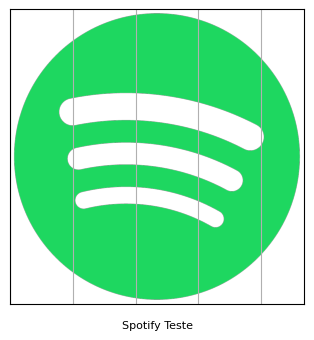

✅ Gráfico gerado com sucesso!


In [221]:

import matplotlib.pyplot as plt
from skimage import io

# 2.  URL de exemplo
nomes = ['Spotify Teste']
# Esta imagem do próprio Google/Blog costuma carregar sem erro 403
urls = ['https://storage.googleapis.com/pr-newsroom-wp/1/2023/05/Spotify_Primary_Logo_RGB_Green.png']

# 3.  função
try:
    visualize_songs(nomes, urls)
    print("✅ Gráfico gerado com sucesso!")
except Exception as e:
    print(f"❌ Ocorreu um erro ao carregar a imagem: {e}")